# Machine Learning TP 1 - Part 1: PCA 

## Packages

In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Vizualisation and feature reduction

### Q1

In [2]:
csv_data = pd.read_csv('villes.csv', sep=';')
X = csv_data.ix[:, 1:13].values
labels = csv_data.ix[:, 0].values
#print(csv_data)

### Q2

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Explained variance
[0.87268193 0.11720602]
Coefficients (cf. graph below)
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]
- The first principal component explains 87.3% of the variance, the second one explains 11.7% and the 3rd one explains 0.3%. Two components are enough to keep 90% of the information.
- The first component seems to be the average of the temperatures. The second seems to give an idea of the extreme temperatures compared to other cities: Brest has very high lower temperatures (in winter) compared to other cities, and its higher temperatures are quite low (in summer) so it will have a very high 2nd component.


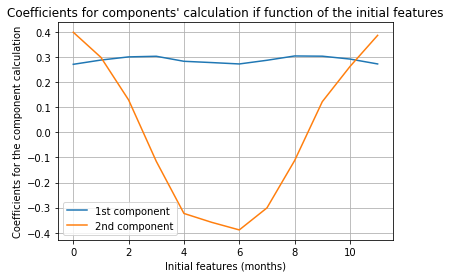

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
print('Explained variance')
print(pca.explained_variance_ratio_)
print('===========================================')
print('Coefficients (cf. graph below)')
print(pca.components_)
print('===========================================')
print('- The first principal component explains 87.3% of the variance, the second one explains 11.7% and the 3rd one explains 0.3%. Two components are enough to keep 90% of the information.')
print('- The first component seems to be the average of the temperatures. The second seems to give an idea of the extreme temperatures compared to other cities: Brest has very high lower temperatures (in winter) compared to other cities, and its higher temperatures are quite low (in summer) so it will have a very high 2nd component.')
plt.plot(pca.components_[0, :], label='1st component')
plt.plot(pca.components_[1, :], label='2nd component')
plt.title('Coefficients for components\' calculation if function of the initial features')
plt.xlabel('Initial features (months)')
plt.ylabel('Coefficients for the component calculation')
plt.grid()
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.legend()


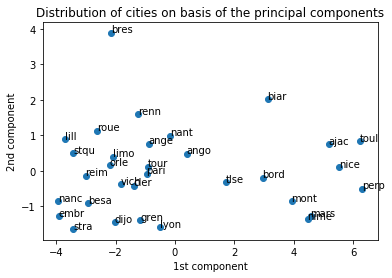

In [5]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Distribution of cities on basis of the principal components')
plt.show()

### Q3

In [6]:
csv_data = pd.read_csv('crimes.csv', sep=';')
X = csv_data.ix[:, 1:8].values # Only 7 features
labels = csv_data.ix[:, 0].values
print(csv_data)
#print(X)

              Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0           Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1            Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2           Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3          Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4        California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5
5          Colorado     6.3  42.0  170.7    292.9  1935.2  3903.2       477.1
6       Connecticut     4.2  16.8  129.5    131.8  1346.0  2620.7       593.2
7          Delaware     6.0  24.9  157.0    194.2  1682.6  3678.4       467.0
8           Florida    10.2  39.6  187.9    449.1  1859.9  3840.5       351.4
9           Georgia    11.7  31.1  140.5    256.5  1351.1  2170.2       297.9
10           Hawaii     7.2  25.5  128.0     64.1  1911.5  3920.4       489.4
11            Idaho     5.5  19.4   39.6    172.5  1050.8  2599.

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Explained variance
[0.58785136 0.17696026 0.10368809 0.04520458]
Coefficients (cf. graph below)
[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]
- With n_components=.9 we get 4 components, it means we need 4 features to explain around 90% of the total variance.
- The first component seems to be the total number of offenses.
- The second seems to be counting positively auto-thefts and negatively meurtres. It kind of discrimates stealing from killing.
- The third seems to be counting positively thefts and negatively larcin (small thefts). It kind of discrimates serious offenses from small ones.
- The fourth seems to be counting positively attacks and negatively thefts. It kind of discr

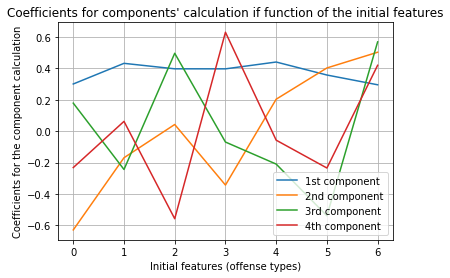

In [8]:
pca = PCA(n_components=.9)
pca.fit(X)
print('Explained variance')
print(pca.explained_variance_ratio_)
print('===========================================')
print('Coefficients (cf. graph below)')
print(pca.components_)
print('===========================================')
print('- With n_components=.9 we get 4 components, it means we need 4 features to explain around 90% of the total variance.')
print('- The first component seems to be the total number of offenses.')
print('- The second seems to be counting positively auto-thefts and negatively meurtres. It kind of discrimates stealing from killing.')
print('- The third seems to be counting positively thefts and negatively larcin (small thefts). It kind of discrimates serious offenses from small ones.')
print('- The fourth seems to be counting positively attacks and negatively thefts. It kind of discrimates violence from stealing.')
plt.plot(pca.components_[0, :], label='1st component')
plt.plot(pca.components_[1, :], label='2nd component')
plt.plot(pca.components_[2, :], label='3rd component')
plt.plot(pca.components_[3, :], label='4th component')
plt.title('Coefficients for components\' calculation if function of the initial features')
plt.xlabel('Initial features (offense types)')
plt.ylabel('Coefficients for the component calculation')
plt.grid()
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.legend()

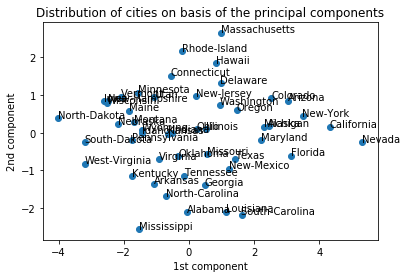

In [9]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Distribution of cities on basis of the principal components')
plt.show()

### Q4

In [10]:
csv_data = pd.read_csv('50_Startups.csv', sep=';')
X = csv_data.ix[:, 1:5].values  # Only 4 features
labels = csv_data.ix[:, 0].values
print(csv_data)
#print(X)

    Id  Depenses R&D  Depenses Administration  Depenses Marketing Spend  \
0    1     165349.20                136897.80                 471784.10   
1    2     162597.70                151377.59                 443898.53   
2    3     153441.51                101145.55                 407934.54   
3    4     144372.41                118671.85                 383199.62   
4    5     142107.34                 91391.77                 366168.42   
5    6     131876.90                 99814.71                 362861.36   
6    7     134615.46                147198.87                 127716.82   
7    8     130298.13                145530.06                 323876.68   
8    9     120542.52                148718.95                 311613.29   
9   10     123334.88                108679.17                 304981.62   
10  11     101913.08                110594.11                 229160.95   
11  12     100671.96                 91790.61                 249744.55   
12  13      93863.75     

In [11]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Explained variance
[0.66804393 0.25484695]
Coefficients (cf. graph below)
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [-0.04048087 -0.95051314  0.30797098  0.00632069]]
- With n_components=.9 we get 2 components, it means we need 4 features to explain around 92% of the total variance.
- The first component seems to be summarizing of all the features except administration expenses.
- The second seems to be very anti-correlated (almost equal) with the admistration expenses


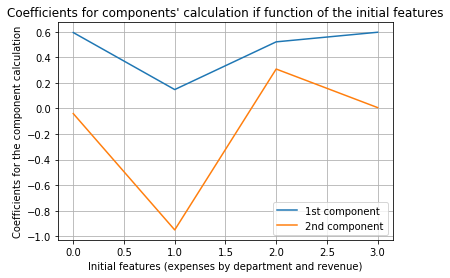

In [12]:
pca = PCA(n_components=.9)
pca.fit(X)
print('Explained variance')
print(pca.explained_variance_ratio_)
print('===========================================')
print('Coefficients (cf. graph below)')
print(pca.components_)
print('===========================================')
print('- With n_components=.9 we get 2 components, it means we need 4 features to explain around 92% of the total variance.')
print('- The first component seems to be summarizing of all the features except administration expenses.')
print('- The second seems to be very anti-correlated (almost equal) with the admistration expenses')
plt.plot(pca.components_[0, :], label='1st component')
plt.plot(pca.components_[1, :], label='2nd component')
plt.title('Coefficients for components\' calculation if function of the initial features')
plt.xlabel('Initial features (expenses by department and revenue)')
plt.ylabel('Coefficients for the component calculation')
plt.grid()
#plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.legend()

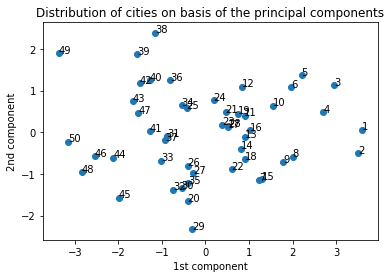

In [13]:
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.title('Distribution of cities on basis of the principal components')
plt.show()